<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CU55_Modelo agregado de estimación del gasto medio por turista</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > II - Data Processing Domain </font>
***
> # <font color='steelblue'> <b>09.3.- Data Cleansing - Outliers</font>

<font color='steelblue'>Data Cleaning refers to identifying and correcting (or removing) errors in the dataset that may negatively impact a predictive model, replacing, modifying, or deleting the dirty or coarse data.</font>

## <font color='steelblue'>Tasks</font>

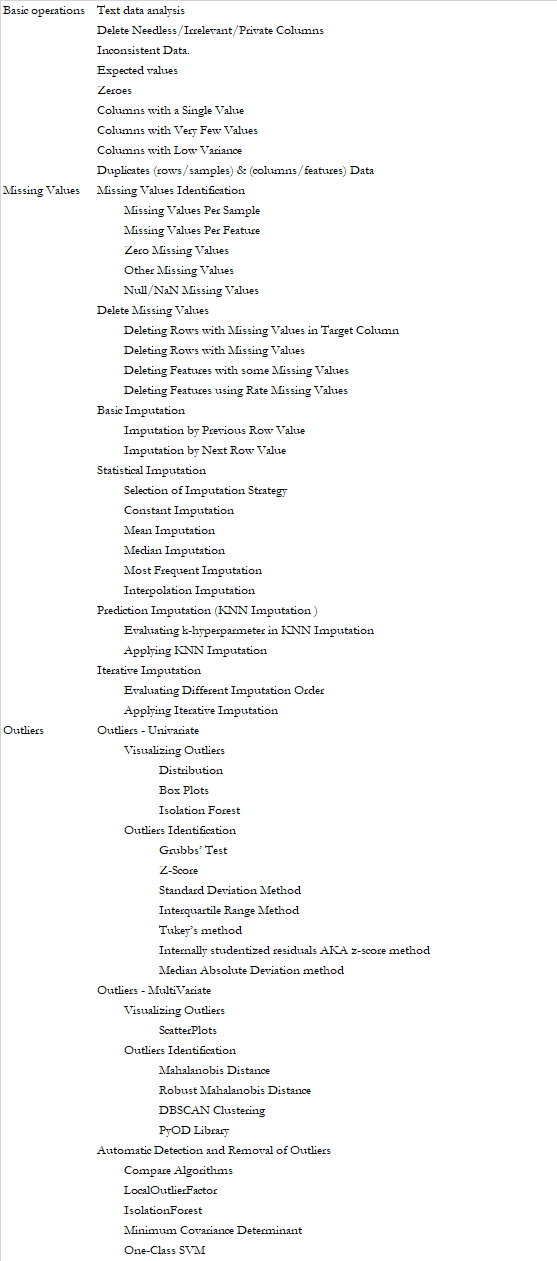


## Consideraciones casos CitizenLab programados en R

* La mayoría de las tareas de este proceso se han realizado en los notebooks del proceso 05 Data Collection porque eran necesarias para las tareas ETL. En esos casos, en este notebook se referencia al notebook del proceso 05 correspondiente
* Por tanto en los notebooks de este proceso de manera general se incluyen las comprobaciones necesarias, y comentarios si procede
* Las tareas del proceso se van a aplicar solo a los archivos que forman parte del despliegue, ya que hay muchos archivos intermedios que no procede pasar por este proceso
* El nombre de archivo del notebook hace referencia al nombre de archivo del proceso 05 al que se aplica este proceso, por eso pueden no ser correlativa la numeración
* Las comprobaciones se van a realizar teniendo en cuenta que el lenguaje utilizado en el despliegue de este caso es R

## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: CU_55_06_03_gasto_municipio.csv</font>
- <font color='steelblue'> <b>Sampled Input File: CU_55_07_03_gasto_municipio.csv</font>
- <font color='steelblue'> <b>Output File: CU_55_09.3_03_gasto_municipio.csv</font>


### Encoding

Con la siguiente expresión se evitan problemas con el encoding al ejecutar el notebook. Es posible que deba ser eliminada o adaptada a la máquina en la que se ejecute el código.

In [26]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

[1] "LC_COLLATE=es_ES.UTF-8;LC_CTYPE=es_ES.UTF-8;LC_MONETARY=es_ES.UTF-8;LC_NUMERIC=C;LC_TIME=es_ES.UTF-8"

## <font color='green'>Settings</font>

### Libraries to use

In [27]:
library(readr)
library(dplyr)
library(tidyr)
library(stringr)
library(ggplot2)

### Paths

In [28]:
iPath <- "Data/Input/"
oPath <- "Data/Output/"

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Seleccionar fichero en ventana para mayor comodidad</font> 

Data load using the {tcltk} package. Ucomment the line if using this option

In [29]:
# file_data <- tcltk::tk_choose.files(multi = FALSE)

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>



In [30]:
iFile <- "CU_55_06_03_gasto_municipio.csv"
file_data <- paste0(iPath, iFile)

if(file.exists(file_data)){
    cat("Se leerán datos del archivo: ", file_data)
} else{
    warning("Cuidado: el archivo no existe.")
}


Se leerán datos del archivo:  Data/Input/CU_55_06_03_gasto_municipio.csv

#### Data file to dataframe

Usar la función adecuada según el formato de entrada (xlsx, csv, json, ...)

In [31]:
data <- read_csv(file_data)


Rows: 50294 Columns: 9
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): mes, pais_orig_cod, pais_orig, mun_dest, CMUN
dbl (4): mun_dest_cod, turistas, gasto, Target

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


<font color='tomato'>Visualizo los datos.</font>

Estructura de  los datos:

In [32]:
data |> glimpse()

Rows: 50,294
Columns: 9
$ mes           <chr> "2019-07", "2019-07", "2019-07", "2019-07", "2019-07", "…
$ pais_orig_cod <chr> "000", "010", "011", "030", "110", "121", "123", "126", …
$ pais_orig     <chr> "Total", "Total Europa", "Total Unión Europea", "Total A…
$ mun_dest_cod  <dbl> 28002, 28002, 28002, 28002, 28002, 28002, 28002, 28002, …
$ mun_dest      <chr> "Ajalvir", "Ajalvir", "Ajalvir", "Ajalvir", "Ajalvir", "…
$ turistas      <dbl> 338, 290, 268, 37, 56, 54, 37, 40, 157, 116, 109, 8461, …
$ CMUN          <chr> "002", "002", "002", "002", "002", "002", "002", "002", …
$ gasto         <dbl> 86.78, 86.78, 86.78, 86.78, 76.36, 78.92, 93.65, 102.04,…
$ Target        <dbl> 86.78, 86.78, 86.78, 86.78, 76.36, 78.92, 93.65, 102.04,…


Muestra de los primeros datos:

In [33]:
data |> slice_head(n = 5)

mes,pais_orig_cod,pais_orig,mun_dest_cod,mun_dest,turistas,CMUN,gasto,Target
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
2019-07,000,Total,28002,Ajalvir,338,002,86.78,86.78
2019-07,010,Total Europa,28002,Ajalvir,290,002,86.78,86.78
2019-07,011,Total Unión Europea,28002,Ajalvir,268,002,86.78,86.78
2019-07,030,Total América,28002,Ajalvir,37,002,86.78,86.78
2019-07,110,Francia,28002,Ajalvir,56,002,76.36,76.36


## Outliers - Univariate

### Visualizing Outliers

<font color='darkgrey'><b>Operation</font>

[1] 183.30 162.67 359.08 183.30 162.67 359.08 177.95 183.30 162.67 359.08
  [11] 359.08 359.08 183.30 162.67 359.08 162.67 359.08 359.08 183.30 162.67
  [21] 359.08 162.67 183.30 162.67 359.08 183.30 183.30 162.67 359.08 183.30
  [31] 162.67 359.08 177.95 183.30 162.67 359.08 183.30 162.67 359.08 162.67
  [41] 359.08 162.67 359.08 183.30 162.67 359.08 162.67 359.08 183.30 162.67
  [51] 359.08 162.67 359.08 183.30 162.67 359.08 162.67 359.08 162.67 359.08
  [61] 359.08 183.30 162.67 359.08 183.30 162.67 359.08 162.67 359.08 162.67
  [71] 183.30 162.67 359.08 162.67 359.08 162.67 359.08 359.08 162.67 359.08
  [81] 162.67 183.30 162.67 359.08 183.30 162.67 359.08 183.30 162.67 359.08
  [91] 177.95 183.30 162.67 359.08 183.30 162.67 359.08 162.67 359.08 359.08
 [101] 183.30 162.67 359.08 359.08 162.67 359.08 359.08 183.30 162.67 359.08
 [111] 162.67 359.08 162.67 359.08 183.30 162.67 359.08 183.30 162.67 359.08
 [121] 177.95 183.30 162.67 359.08 162.67 359.08 359.08 162.67 359.08 162.67
 [131] 359.08 162.67 162.67 359.08 183.30 162.67 359.08 162.67 359.08 162.67
 [141] 183.30 162.67 359.08 183.30 162.67 359.08 183.30 162.67 359.08 177.95
 [151] 183.30 162.67 359.08 183.30 162.67 359.08 359.08 162.67 359.08 162.67
 [161] 359.08 183.30 162.67 359.08 162.67 359.08 183.30 162.67 359.08 162.67
 [171] 359.08 183.30 183.30 162.67 359.08 162.67 359.08 359.08 162.67 359.08
 [181] 359.08 211.23 176.65 389.76 211.23 176.65 389.76 243.63 211.23 176.65
 [191] 389.76 211.23 176.65 389.76 389.76 389.76 211.23 389.76 176.65 389.76
 [201] 176.65 389.76 176.65 389.76 211.23 176.65 389.76 176.65 211.23 176.65
 [211] 389.76 389.76 211.23 176.65 389.76 163.90 211.23 176.65 389.76 243.63
 [221] 211.23 176.65 389.76 211.23 176.65 389.76 176.65 389.76 176.65 389.76
 [231] 176.65 389.76 211.23 176.65 389.76 176.65 389.76 211.23 176.65 389.76
 [241] 176.65 389.76 211.23 211.23 176.65 389.76 211.23 176.65 389.76 389.76
 [251] 176.65 389.76 389.76 211.23 389.76 211.23 176.65 389.76 211.23 176.65
 [261] 389.76 243.63 211.23 176.65 389.76 176.65 389.76 389.76 211.23 389.76
 [271] 389.76 176.65 389.76 389.76 176.65 389.76 176.65 211.23 176.65 389.76
 [281] 389.76 211.23 176.65 389.76 163.90 211.23 176.65 389.76 243.63 176.65
 [291] 389.76 211.23 176.65 389.76 389.76 176.65 389.76 176.65 389.76 211.23
 [301] 176.65 389.76 176.65 389.76 211.23 176.65 389.76 176.65 389.76 389.76
 [311] 211.23 176.65 389.76 211.23 176.65 389.76 176.65 389.76 389.76 389.76
 [321] 211.23 176.65 389.76 211.23 176.65 389.76 243.63 211.23 176.65 389.76
 [331] 176.65 389.76 176.65 389.76 176.65 176.65 176.65 389.76 211.23 176.65
 [341] 389.76 211.23 176.65 389.76 176.65 211.23 176.65 389.76 211.23 176.65
 [351] 389.76 163.90 211.23 176.65 389.76 243.63 211.23 176.65 389.76 211.23
 [361] 176.65 389.76 176.65 176.65 389.76 176.65 389.76 211.23 176.65 389.76
 [371] 243.63 176.65 389.76 211.23 176.65 389.76 389.76 211.23 176.65 389.76
 [381] 211.23 176.65 389.76 176.65 389.76 389.76 389.76 179.10 278.19 179.10
 [391] 278.19 199.12 179.10 278.19 278.19 278.19 278.19 179.10 278.19 278.19
 [401] 179.10 278.19 179.10 278.19 179.10 278.19 179.10 278.19 179.10 179.10
 [411] 278.19 179.10 278.19 199.12 179.10 278.19 179.10 278.19 179.10 278.19
 [421] 278.19 278.19 179.10 278.19 278.19 179.10 278.19 278.19 179.10 278.19
 [431] 179.10 278.19 278.19 278.19 278.19 179.10 278.19 179.10 278.19 179.10
 [441] 278.19 278.19 278.19 278.19 278.19 278.19 278.19 278.19 179.10 278.19
 [451] 179.10 278.19 199.12 179.10 278.19 179.10 278.19 278.19 278.19 179.10
 [461] 278.19 278.19 179.10 278.19 179.10 278.19 179.10 278.19 278.19 278.19
 [471] 179.10 278.19 179.10 278.19 278.19 278.19 278.19 278.19 278.19 179.10
 [481] 278.19 278.19 179.10 278.19 199.12 278.19 278.19 278.19 278.19 179.10
 [491] 278.19 278.19 278.19 179.10 278.19 278.19  44.01 254.36 306.44  44.01
 [501] 254.36 173.08 306.44  44.01 306.44  44.01  44.01  44.01 173.08  44.01
 [511] 173.08 306.44  44.01  44.01  44.01  44.01 306.44  44.01 173.08  44.01

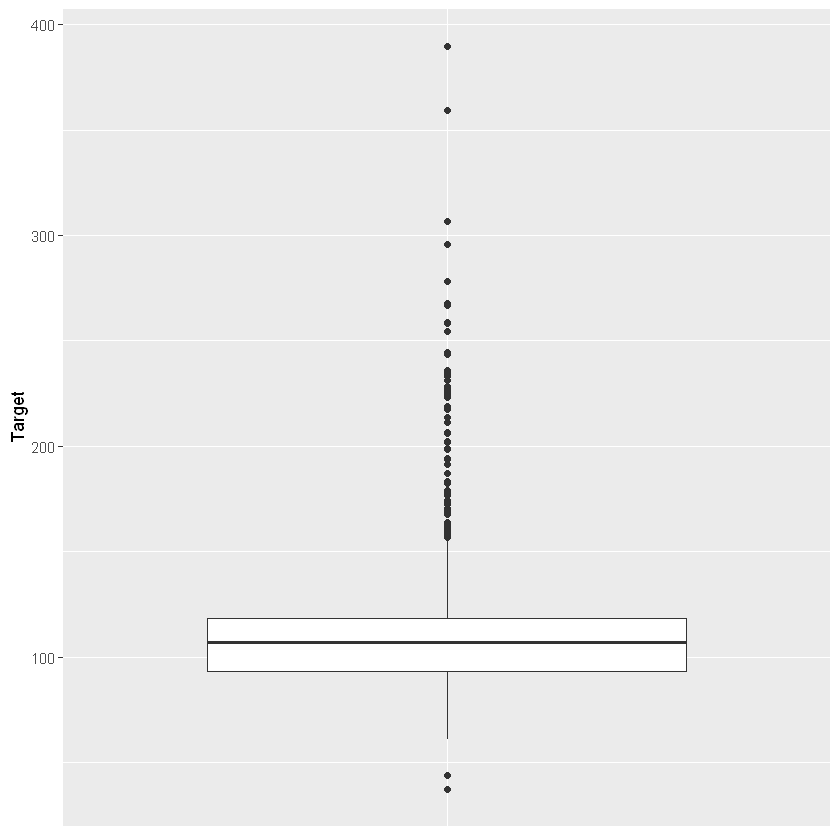

In [34]:
# Get the names of all numeric columns
ggplot(data, aes(x = "", y = Target)) +
  geom_boxplot() +
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
boxplot.stats(data$Target)$out

#### Isolation Forest

La cantidad de posibles valores hace que este proceso no aporte información

<font color='tomato'>Selecting feature to analyze</font>

In [35]:
# # Selecting # Selecting feature to analyze
# x <- "CMUN"  # replace with your column namefeature to plot
# y <- "Target"  # replace with your column namefeature to plot

<font color='darkgrey'><b>Operation</font>

In [36]:
# if(!require(solitude)) install.packages('solitude')
# if(!require(ggplot2)) install.packages('ggplot2')
# if(!require(plotly)) install.packages('plotly')

# library(solitude)
# library(ggplot2)
# library(plotly)

# model <- isolationForest$new(num_trees = 100)
# model$fit(data)

# anomaly_scores <- model$predict(data)
# data$anomaly_scores <- anomaly_scores

# # Create a scatter plot with anomaly scores as the color
# plot <- ggplot(data, aes(x = x, y = y, color = anomaly_scores)) +
#   geom_point() +
#   scale_color_gradient(low = "blue", high = "red") +
#   theme_minimal() +
#   ggtitle("Isolation Forest Anomaly Scores")

# # Convert to an interactive plotly plot
# plotly::ggplotly(plot)

### Outliers Identification

#### Grubbs’ Test

<font color='tomato'>Selecting feature to analyze</font>

In [37]:
# # Selecting feature to analyze
# column_name <- "Target"  # replace with your column name


<font color='darkgrey'><b>Operation</font>

In [38]:
if (!require(outliers)) {
    install.packages("outliers")
}

library(outliers)

print(grubbs.test(data[["Target"]], opposite = FALSE))


	Grubbs test for one outlier

data:  data[["Target"]]
G = 9.47442, U = 0.99822, p-value < 2.2e-16
alternative hypothesis: highest value 389.76 is an outlier



#### Z-Score

<font color='tomato'>Selecting feature to analyze</font>

In [39]:
# Selecting feature to analyze
column_name <- "Target"  # replace with your column name

<font color='darkgrey'><b>Operation</font>

In [40]:
# Define a threshold to identify an outlier.
# List of row numbers with outlier 
# Choose the numeric column from your data

# Calculate the z-score
z_scores <- scale(data[[column_name]])

# Define a threshold for identifying outliers (e.g., z-score > 5 or z-score < -5)
threshold <- 5

<font color='darkgrey'><b>Operation</font>

In [41]:

# Find the row numbers with z-scores exceeding the threshold
outlier_rows <- which(abs(z_scores) > threshold)

# Print the row numbers with outliers
print(outlier_rows)

  [1]    48    84   119   144   211   252   406   433   499   559   640   748
 [13]   800   897   973  1015  1047  1093  1137  1176  1239  1310  1493  1529
 [25]  1581  1617  1649  1793  1892  1961  1988  2060  2123  2205  2316  2368
 [37]  2476  2561  2607  2636  2679  2724  2763  2831  2905  3132  3186  3226
 [49]  3262  3341  3357  3397  3475  3533  3560  3628  3693  3771  3884  3939
 [61]  4037  4089  4117  4157  4187  4230  4268  4309  4380  4451  4457  4644
 [73]  4677  4731  4767  4803  4864  4885  4899  4936  5018  5080  5109  5181
 [85]  5243  5266  5321  5430  5482  5574  5626  5653  5689  5720  5764  5800
 [97]  5841  5900  5973  5980  6061  6152  6184  6231  6266  6299  6376  6390
[109]  6419  6499  6559  6585  6652  6714  6757  6790  6894  6943  7033  7078
[121]  7103  7141  7170  7208  7248  7285  7301  7346  7410  7494  7586  7616
[133]  7664  7699  7732  7821  7852  7991  8020  8085  8146  8224  8345  8399
[145]  8487  8562  8601  8629  8669  8709  8744  8804  8867  896

#### Standard Deviation Method

<font color='darkgrey'><b>Operation</font>

In [42]:
# Selecting feature to analyze
column_name <- "Target"  # replace with your column name
     

In [43]:
# identify outliers with standard deviation
# Choose the numeric column from your data
column_name_df <- data[[column_name]]

# Calculate the mean and standard deviation of the column
column_mean <- mean(column_name_df)
column_sd <- sd(column_name_df)

# Define the threshold as a multiple of the standard deviation (e.g., 3 times the standard deviation)
threshold <- 3

# Identify the outliers based on the threshold
outliers <- column_name_df > (column_mean + threshold * column_sd) | column_name_df < (column_mean - threshold * column_sd)

# Remove the outliers from the column
column_name_df[!outliers] <- NA

# Print the updated column with outliers removed
print(column_name_df)

    [1]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [11]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [21]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [31]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [41]     NA     NA     NA     NA     NA     NA     NA 359.08     NA     NA
   [51]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [61]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [71]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [81]     NA     NA     NA 359.08     NA     NA     NA     NA     NA     NA
   [91]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [101]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [111]     NA     NA     NA     NA     NA     NA     NA     NA 359.08     NA
  [121]     NA     NA     NA     NA     NA     NA     NA     NA 

#### Interquartile Range Method

<font color='tomato'>Selecting factor k</font>

In [44]:
# Selecting feature to analyze
column_name <- "Target"  # replace with your column name

# Selecting factor k
# Define the threshold as a multiplier of the IQR (e.g., 1.5 times the IQR)
threshold <- 1.5

<font color='darkgrey'><b>Operation</font>

In [45]:
# Choose the numeric column from your data
column_name_df <- data[[column_name]]

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 <- quantile(column_name_df, 0.25)
Q3 <- quantile(column_name_df, 0.75)

# Calculate the IQR (Interquartile Range)
IQR <- Q3 - Q1



# Identify the outliers based on the threshold
outliers <- column_name_df < (Q1 - threshold * IQR) | column_name_df > (Q3 + threshold * IQR)

# Remove the outliers from the column
column_name_df[!outliers] <- NA

# Print the updated column with outliers removed
print(column_name_df)


    [1]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [11]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [21]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [31]     NA     NA     NA     NA     NA 183.30     NA     NA     NA     NA
   [41]     NA     NA     NA     NA     NA 162.67     NA 359.08     NA     NA
   [51]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [61]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [71]     NA 183.30     NA     NA     NA     NA     NA     NA     NA 162.67
   [81]     NA     NA     NA 359.08 177.95     NA     NA     NA     NA     NA
   [91]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [101]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [111]     NA 183.30     NA     NA     NA     NA     NA 162.67 359.08     NA
  [121]     NA     NA     NA     NA     NA     NA     NA     NA 

#### Tukey’s method

In [46]:
# Selecting feature to analyze
column_name <- "Target"  # replace with your column name     

In [47]:
#Tukey's method
column_name_df <- data[[column_name]]
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 <- quantile(column_name_df, 0.25)
Q3 <- quantile(column_name_df, 0.75)

# Calculate the interquartile range (IQR)
IQR <- Q3 - Q1

# Define the multiplier for Tukey's method (e.g., 1.5 times the IQR)
multiplier <- 1.5

# Calculate the lower and upper bounds for outliers
lower_bound <- Q1 - multiplier * IQR
upper_bound <- Q3 + multiplier * IQR

# Identify the outliers based on the bounds
outliers <- column_name_df < lower_bound | column_name_df > upper_bound

# Remove the outliers from the column
column_name_df[!outliers] <- NA

# Print the updated column with outliers removed
print(column_name_df)

    [1]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [11]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [21]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [31]     NA     NA     NA     NA     NA 183.30     NA     NA     NA     NA
   [41]     NA     NA     NA     NA     NA 162.67     NA 359.08     NA     NA
   [51]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [61]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [71]     NA 183.30     NA     NA     NA     NA     NA     NA     NA 162.67
   [81]     NA     NA     NA 359.08 177.95     NA     NA     NA     NA     NA
   [91]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [101]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [111]     NA 183.30     NA     NA     NA     NA     NA 162.67 359.08     NA
  [121]     NA     NA     NA     NA     NA     NA     NA     NA 

#### Internally studentized residuals AKA z-score method

In [48]:
# Selecting feature to analyze
column_name <- "Target"  # replace with your column name     


In [49]:
#Internally studentized method (z-score)
# Calculate the z-scores for each data point
column_name_df <- data[[column_name]]
z_scores <- scale(column_name_df)

# Define a threshold for identifying outliers (e.g., z-score > 3 or z-score < -3)
threshold <- 3

# Identify the outliers based on the z-scores
outliers <- abs(z_scores) > threshold

# Remove the outliers from the column by replacing them with NA
column_name_df[outliers] <- NA

# Print the updated column with outliers removed
print(column_name_df)

    [1]  86.780  86.780  86.780  86.780  76.360  78.920  93.650 102.040  86.780
   [10]  86.780  86.780  86.780  86.780  86.780  86.780  86.780  86.780  86.780
   [19]  86.780  92.570  85.460  86.780  78.390  76.360  86.780  88.950  88.990
   [28]  86.780  78.920  60.790  93.650 123.220 102.040 109.210  72.900 183.300
   [37]  86.780  86.780  94.320  86.780  86.780  86.780 119.050  86.910 117.090
   [46] 162.670  86.780      NA 116.040  86.780  86.780  86.780  86.780  86.780
   [55]  86.780  86.780  86.780  92.570  85.460  78.390  76.360  88.950  88.990
   [64]  86.780  78.920  60.790  93.650 123.220 102.040 109.210  72.900 183.300
   [73]  86.780  86.780  99.500 119.050 133.350  86.910 117.090 162.670  86.780
   [82]  86.780  86.780      NA 177.950  86.780 116.410 116.040  91.330  86.780
   [91]  86.780  86.780  86.780  86.780  86.780  86.780  86.780  92.570  85.460
  [100]  78.390  76.360  88.950  88.990  86.780  78.920  60.790  93.650 123.220
  [109] 102.040 109.210  72.900 183.300 

#### Median Absolute Deviation method

In [50]:
# Selecting feature to analyze
column_name <- "Target"  # replace with your column name     


In [51]:
#MAD method
column_name_df <- data[[column_name]]
# Calculate the median absolute deviation (MAD)
mad <- median(abs(column_name_df - median(column_name_df, na.rm = TRUE)), na.rm = TRUE)

# Define a threshold for identifying outliers (e.g., 3 times the MAD)
threshold <- 3 * mad

# Identify the outliers based on the MAD
outliers <- abs(column_name_df - median(column_name_df, na.rm = TRUE)) > threshold

# Remove the outliers from the column by replacing them with NA
column_name_df[outliers] <- NA

# Print the updated column with outliers removed
print(column_name_df)

    [1]  86.780  86.780  86.780  86.780  76.360  78.920  93.650 102.040  86.780
   [10]  86.780  86.780  86.780  86.780  86.780  86.780  86.780  86.780  86.780
   [19]  86.780  92.570  85.460  86.780  78.390  76.360  86.780  88.950  88.990
   [28]  86.780  78.920      NA  93.650 123.220 102.040 109.210  72.900      NA
   [37]  86.780  86.780  94.320  86.780  86.780  86.780 119.050  86.910 117.090
   [46]      NA  86.780      NA 116.040  86.780  86.780  86.780  86.780  86.780
   [55]  86.780  86.780  86.780  92.570  85.460  78.390  76.360  88.950  88.990
   [64]  86.780  78.920      NA  93.650 123.220 102.040 109.210  72.900      NA
   [73]  86.780  86.780  99.500 119.050 133.350  86.910 117.090      NA  86.780
   [82]  86.780  86.780      NA      NA  86.780 116.410 116.040  91.330  86.780
   [91]  86.780  86.780  86.780  86.780  86.780  86.780  86.780  92.570  85.460
  [100]  78.390  76.360  88.950  88.990  86.780  78.920      NA  93.650 123.220
  [109] 102.040 109.210  72.900      NA 

#### DBSCAN Clustering

<font color='tomato'>Selecting feature to analyze</font>

In [52]:
# Selecting feature to analyze
column_name <- "Target"  # replace with your column name     

<font color='darkgrey'><b>Operation</font>

In [53]:
if(!require(dbscan)){
    install.packages("dbscan")
}
library(dbscan)

# Select the numeric columns from the data frame
numeric_data <- data[, column_name]

# Perform DBSCAN clustering on the numeric data
dbscan_result <- dbscan(numeric_data, eps = 0.5, minPts = 5)

# Extract the cluster labels assigned by DBSCAN
cluster_labels <- dbscan_result$cluster


Loading required package: dbscan

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'dbscan'"
Installing package into 'C:/Users/Vicente/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'dbscan' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Vicente\AppData\Local\Temp\RtmpGAUqbR\downloaded_packages



Attaching package: 'dbscan'


The following object is masked from 'package:stats':

    as.dendrogram




In [55]:
# Index of rows with outliers
# Identify the outliers as points that are not assigned to any cluster (noise points)
outlier_indices <- which(cluster_labels == 0)
outlier_indices

[1]  5363  6830  8268  9169  9824 11242 12533 16332 16351 17512 17531 18660
[13] 18679 19745 19807 19817 20799 20861 20872 21877 21944 21957 22963 23016
[25] 23029 23963 24012 24023 24941 24996 25008 26004 27035 28148 33232 34545
[37] 35826 37110 38337 39524 40803 42202 43001 43621 48893 49546